# ORACLE REDBULL RACING 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\ORACLE RED BULL RACING F1 TEAM HISTORY\Data\REDBULL ORACLE RACING .csv")

--> Make a column of total points scored by each driver.

In [3]:
gp_columns = [col for col in df.columns if col.startswith('GP')]
df['Total-Points'] = df[gp_columns].sum(axis=1, skipna=True)

### Point Scored by each driver for Red Bull F1 team 

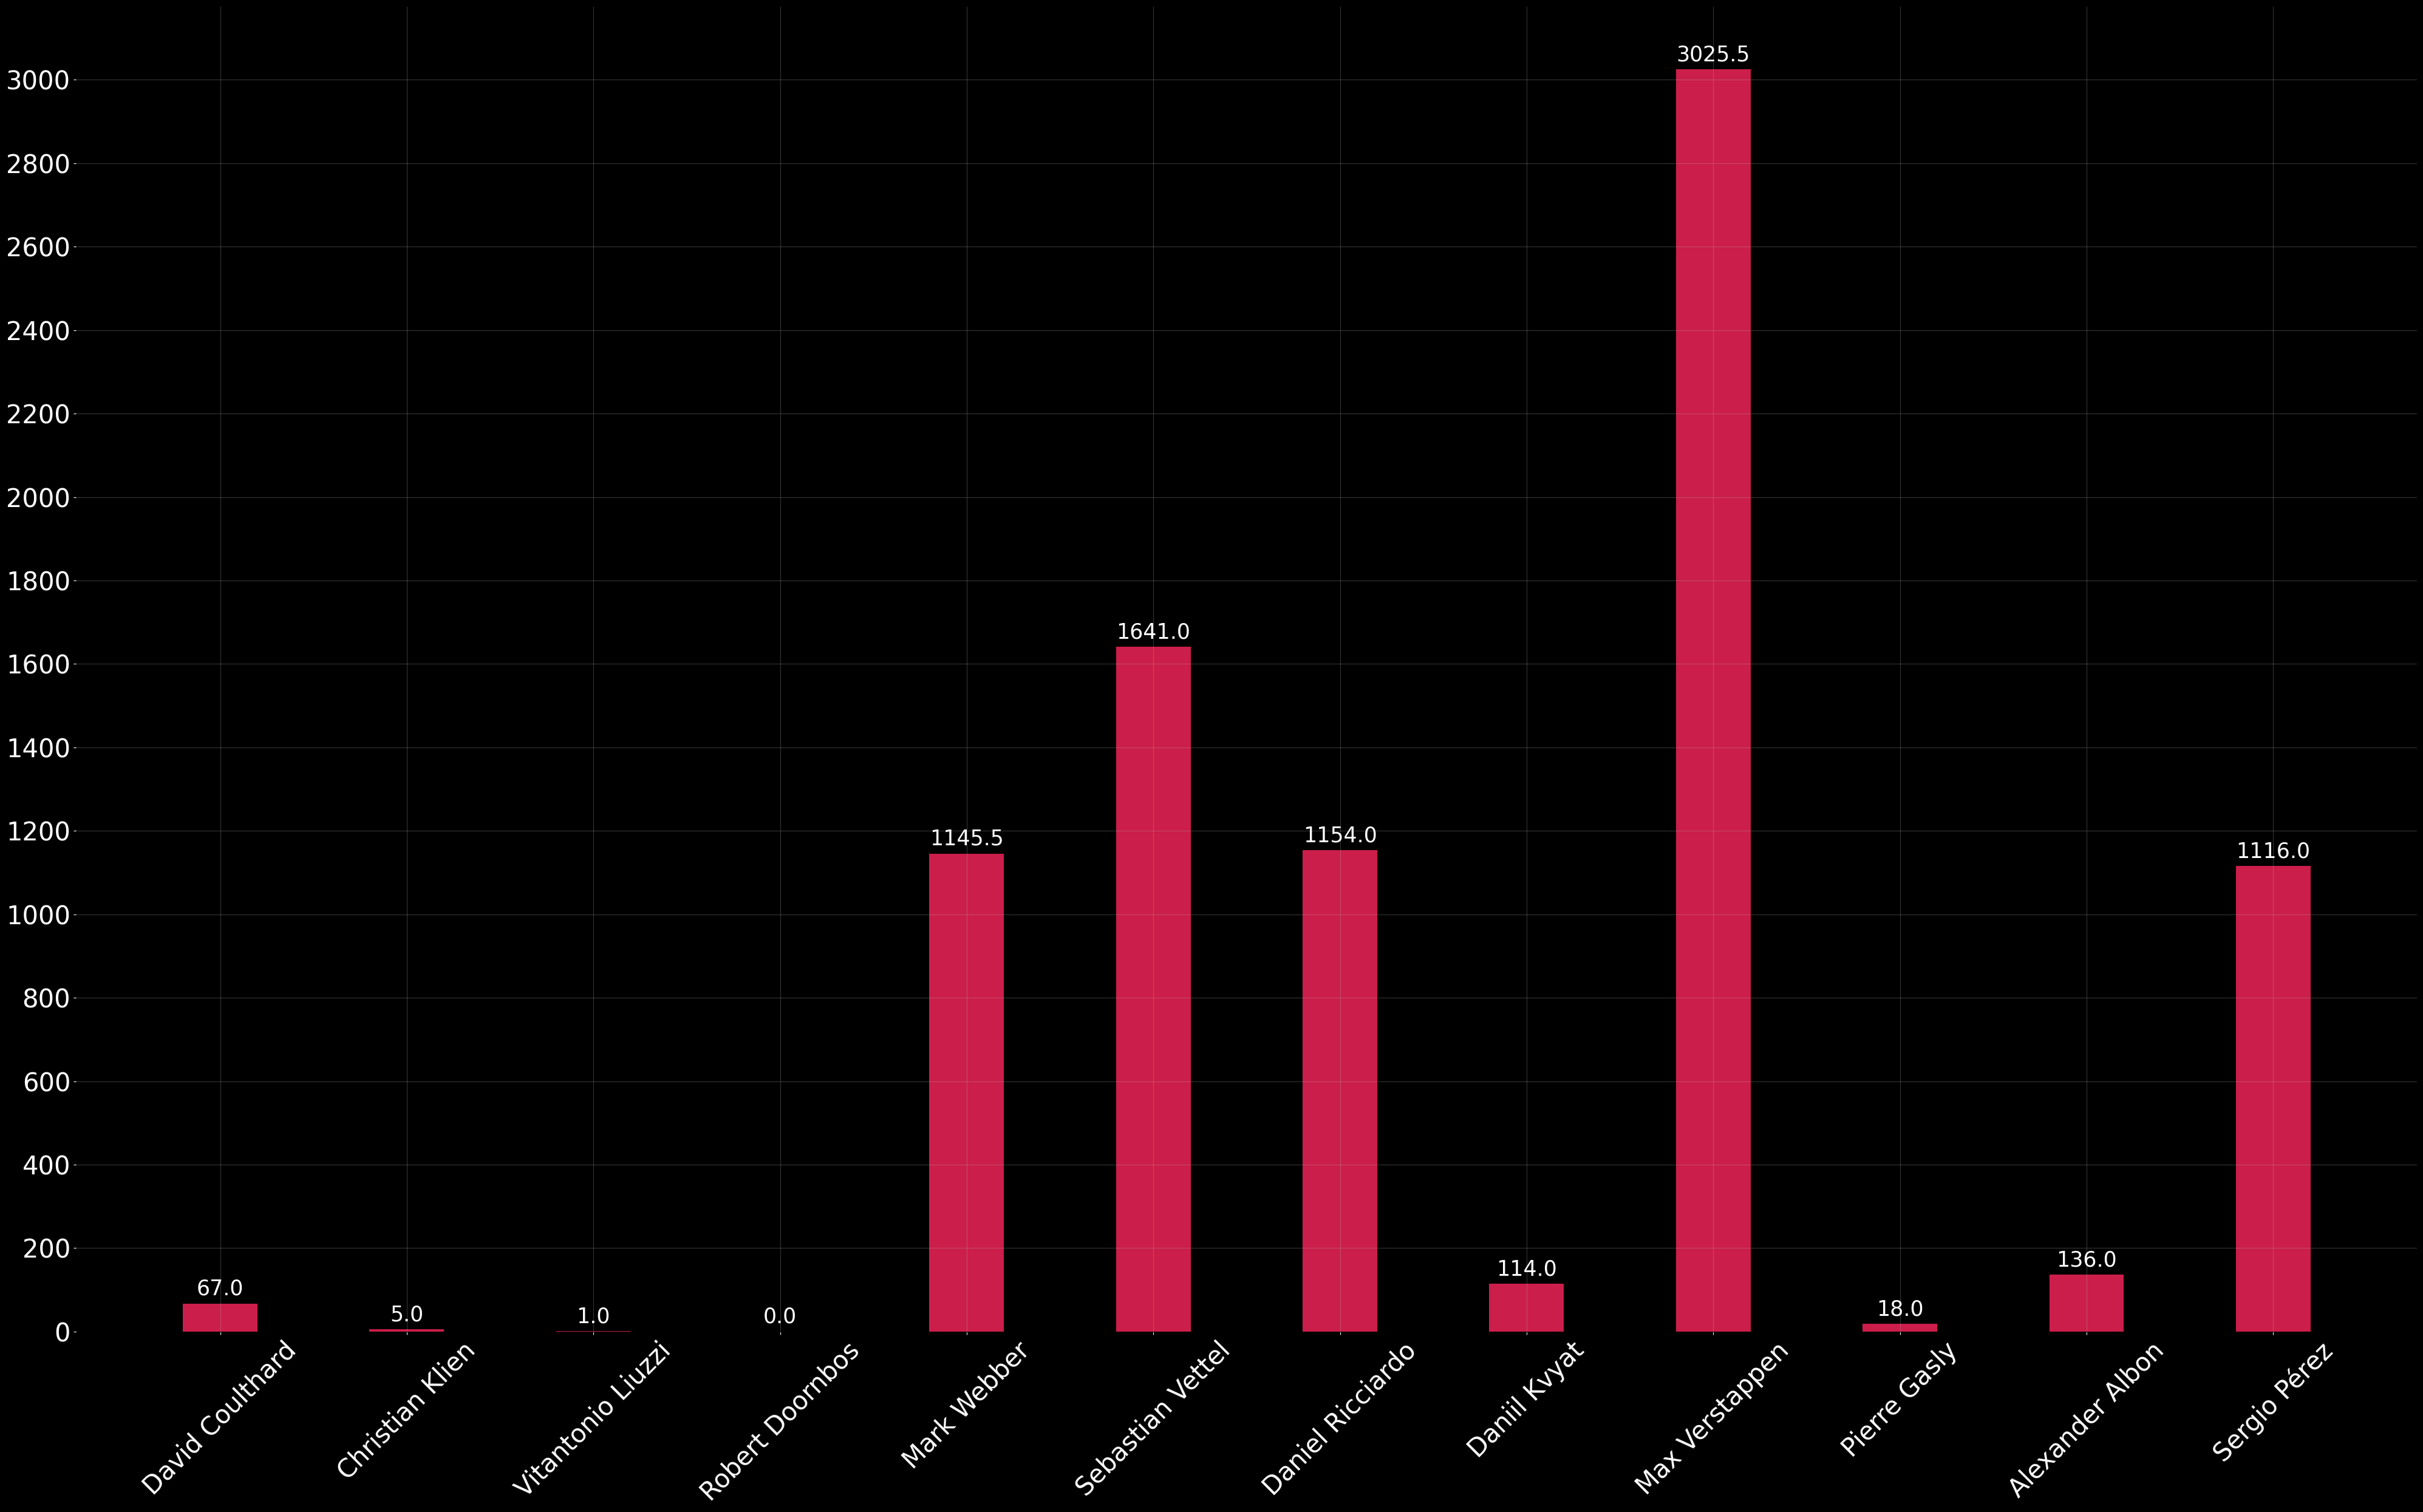

In [4]:
x = df['DRIVER'].unique()
y = df.groupby('DRIVER')['Total-Points'].sum().loc[x]

plt.figure(figsize=(40,25),facecolor='black')

ax = plt.gca()
ax.tick_params(axis='both', colors='white')     # Change axis coordinate color
ax.set_facecolor('black')

bar_width = 0.4
bars = plt.bar(
    x,y,
    width = bar_width,
    color = '#CC1E4A',
)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10,                  # Add vertical spacing
        f'{height:.1f}',             # One decimal place
        ha='center',
        va='bottom',
        fontsize=25,
        color='white',               # Stand out from dark background
        rotation=0
    )



plt.xticks(x, rotation = 45, fontsize=30)
plt.yticks(range(0,3200,200), fontsize = 30)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

### Pie Chart 

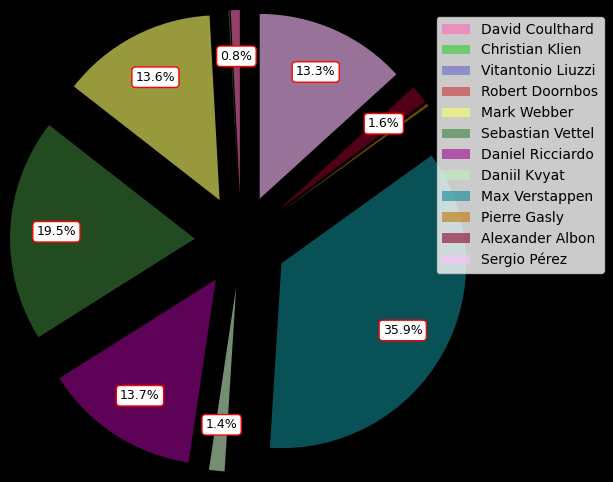

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

labels = df['DRIVER'].unique()
size = df.groupby('DRIVER')['Total-Points'].sum().astype(int).loc[labels]

def custom_autopct(pct):
    return f'{pct:.1f}%' if pct > 0.5 else ''

explode = [0.25] * len(size)

colors = ['#FF69B4', '#33CC33', '#6666CC', '#CC3333', '#FFFF66', "#3C7E39", 
          "#9D0593", "#C1EEC1", "#0F8893", "#C37500", "#8A0027", "#FFBFFF"]

wedges, texts, autotexts = ax.pie(
    size,
    startangle = 90,
    colors = colors,
    explode = explode,
    autopct = custom_autopct,
    labeldistance = 1.05,
    pctdistance = 0.75,
    textprops={'fontsize': 9, 'bbox': dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3')}
)
for wedge in wedges:
    wedge.set_alpha(0.6)
    
ax.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 1))

# Backgorund image 
# img = mpimg.imread(r"C:\Users\LENOVO\Downloads\826139-1920x1080-desktop-full-hd-oracle-red-bull-racing-wallpaper.jpg")
# #img = img.resize((800, 600))
# ax.imshow(img, alpha=0.5, extent=[-2, 2, -1.5, 1.5], aspect='auto', zorder=0)

plt.show()
